# Effect of Wavelet-based Pre-processing on Artifact Detection: A Comparative Study of LDA and Hierarchical Clustering in EEG Signal Analysis

### Course: E-Health | Student: Griselda Kolici 

###  Importing the necessary libraries and modules

In [1]:
import csv
import mne
import os
import pywt
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

###  Iterating over files in the folder and creating corresponding CSV file paths

In [2]:
folder_path = "/Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le"  

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".edf"):
        edf_file = os.path.join(folder_path, filename)
        csv_file = os.path.join(folder_path, filename[:-4] + ".csv")  #since each edf file has its corresponding edf file and they have the same name
        
        # Print the names of the EDF and CSV files
        print("EDF file:", edf_file)
        print("CSV file:", csv_file)

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.csv
EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.csv
EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_t000.csv
EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s020_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s020_t001.csv
EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t000.csv
EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaabms_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/0

### Checking the number of the patients on the current folder

In [152]:
patient_identifiers = set()

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".edf"):
        edf_file = os.path.join(folder_path, filename)
        
        # Extract the subject identifier from the filename
        identifier = filename.split("_")[0]
        patient_identifiers.add(identifier)

# Print the number of unique patient identifiers
print("Number of patients:", len(patient_identifiers))

Number of patients: 9


### Plotting EDF files

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Using matplotlib as 2D backend.


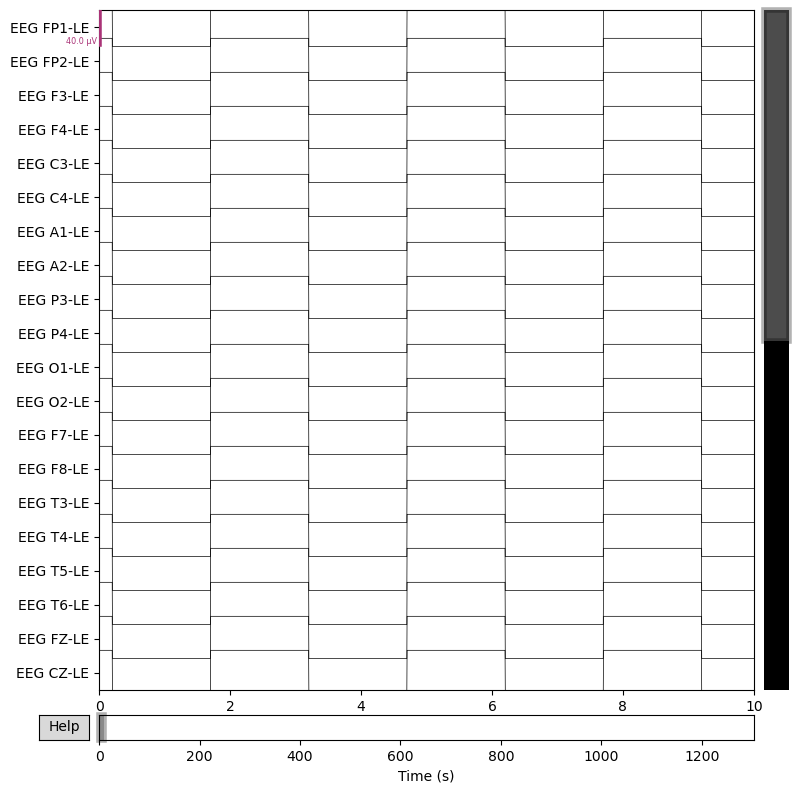

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


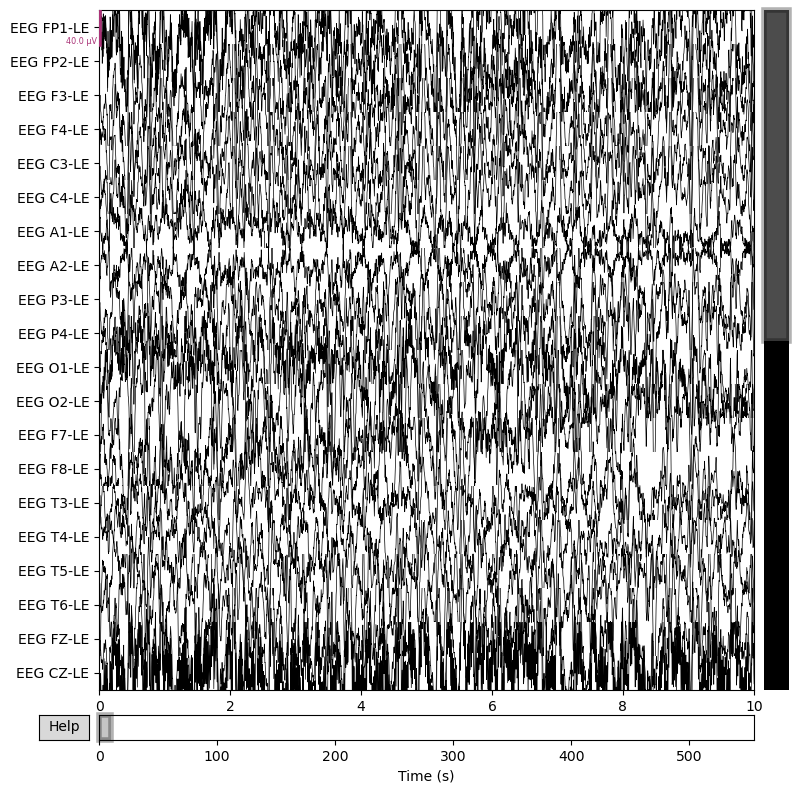

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


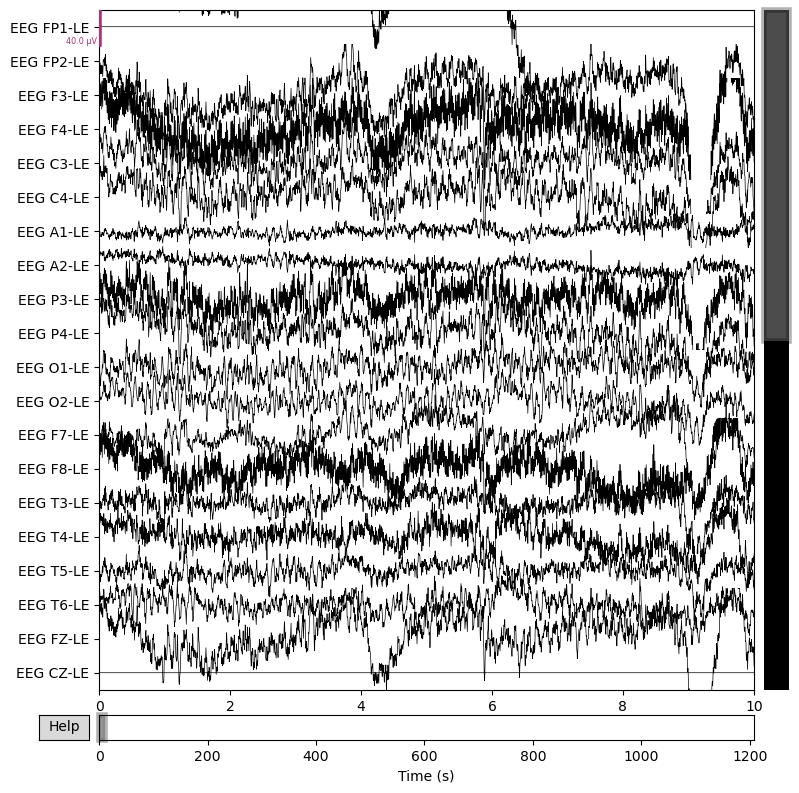

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s020_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s020_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s020_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


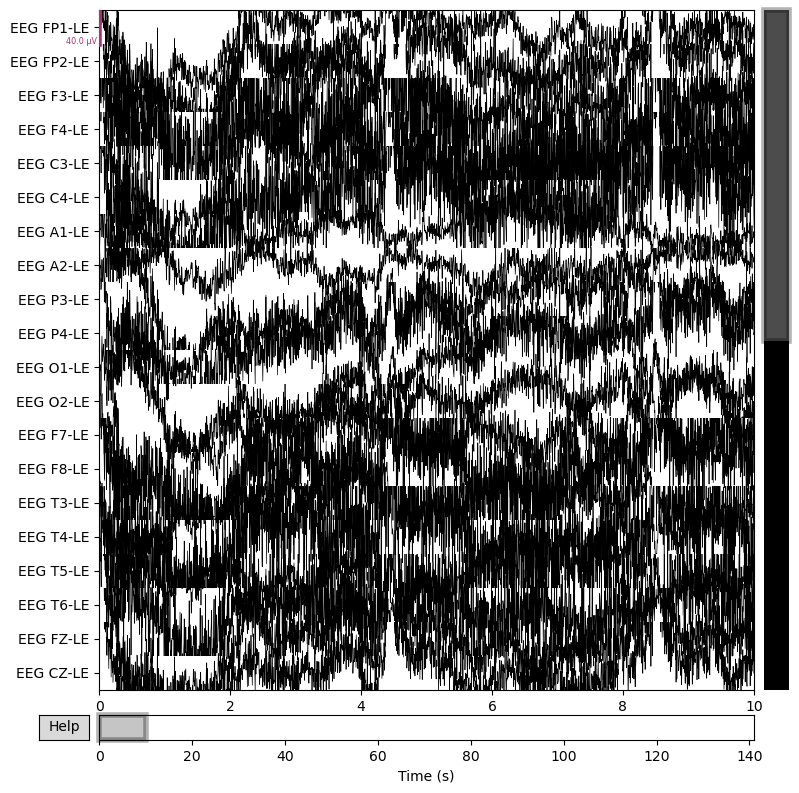

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


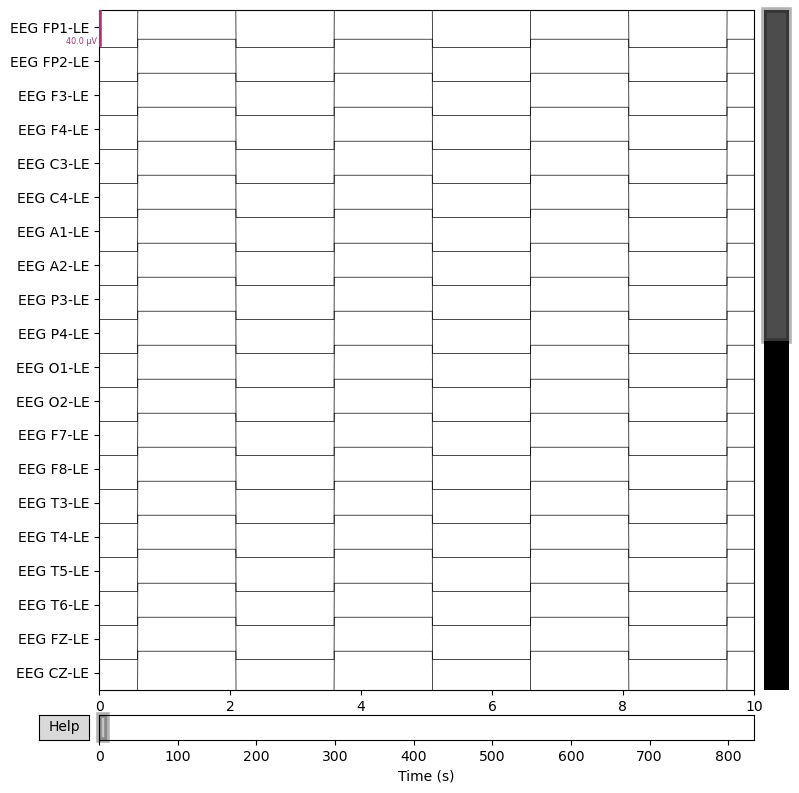

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaabms_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaabms_s001_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaabms_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


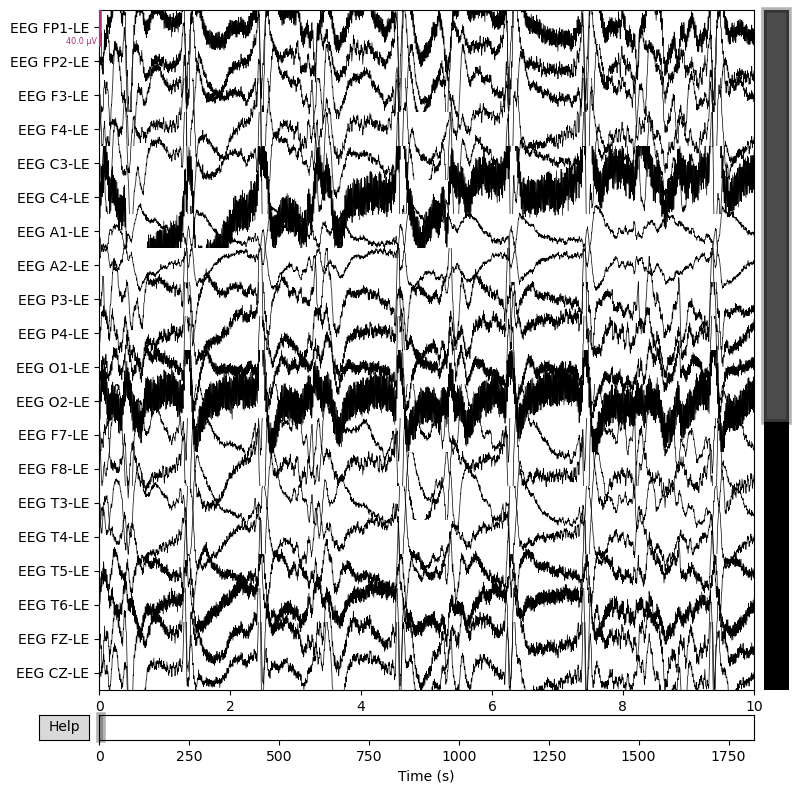

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s001_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s001_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


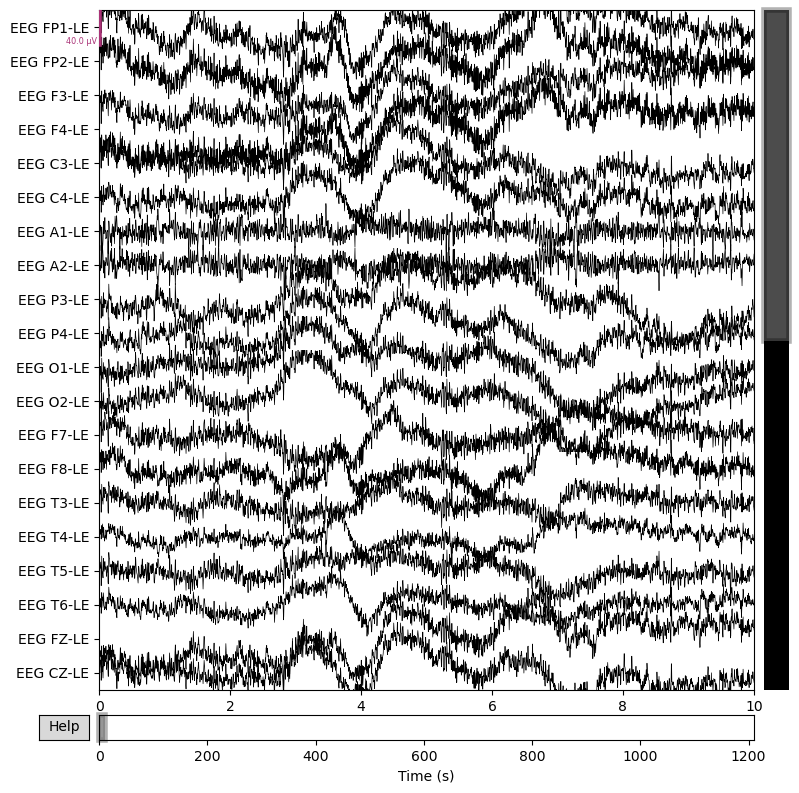

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s008_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s008_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s008_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


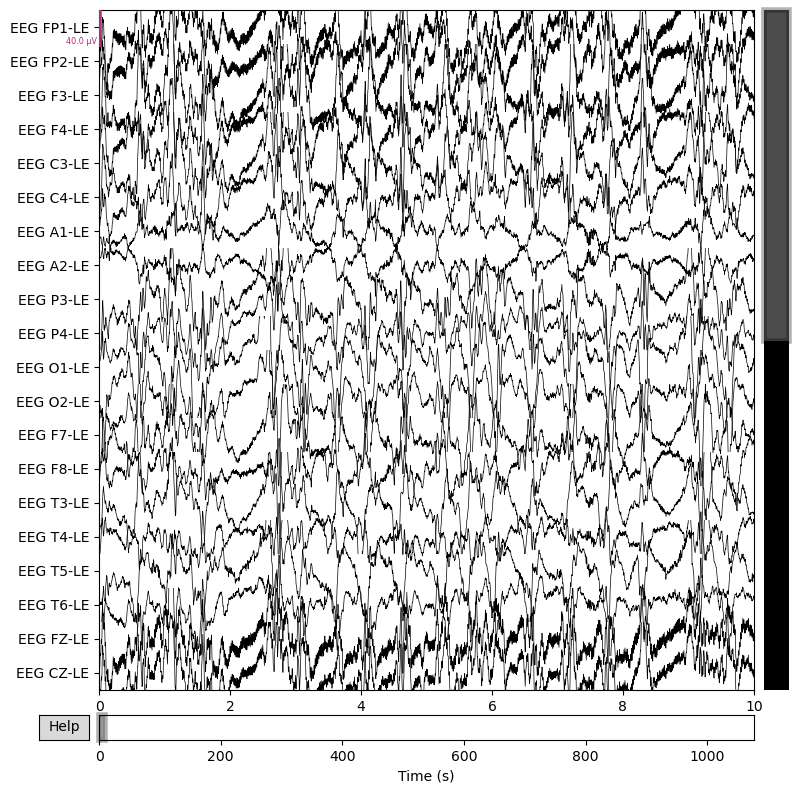

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqb_s001_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqb_s001_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqb_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


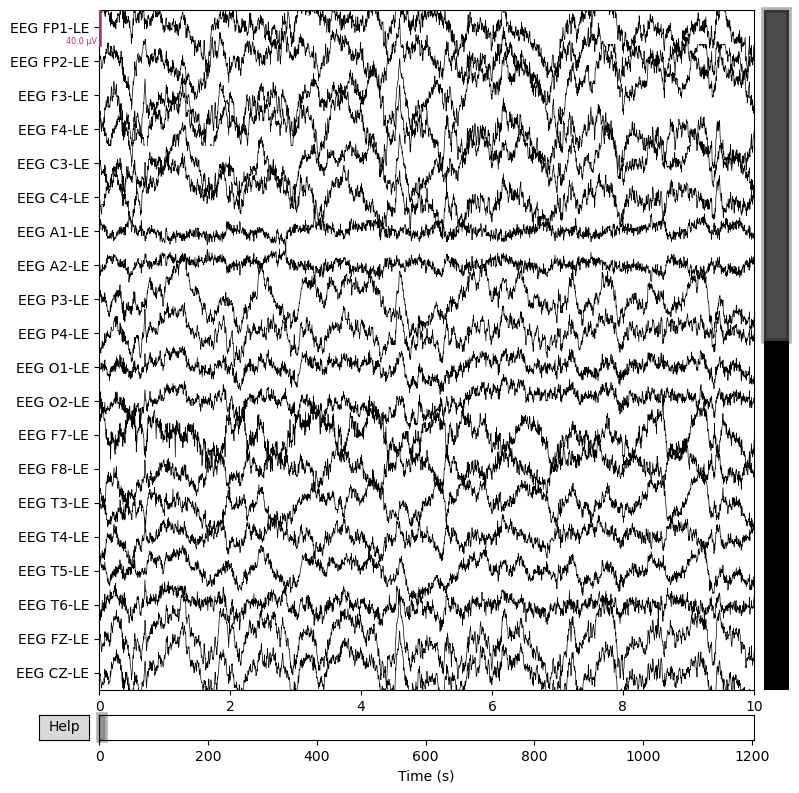

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaltw_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaltw_s001_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaltw_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


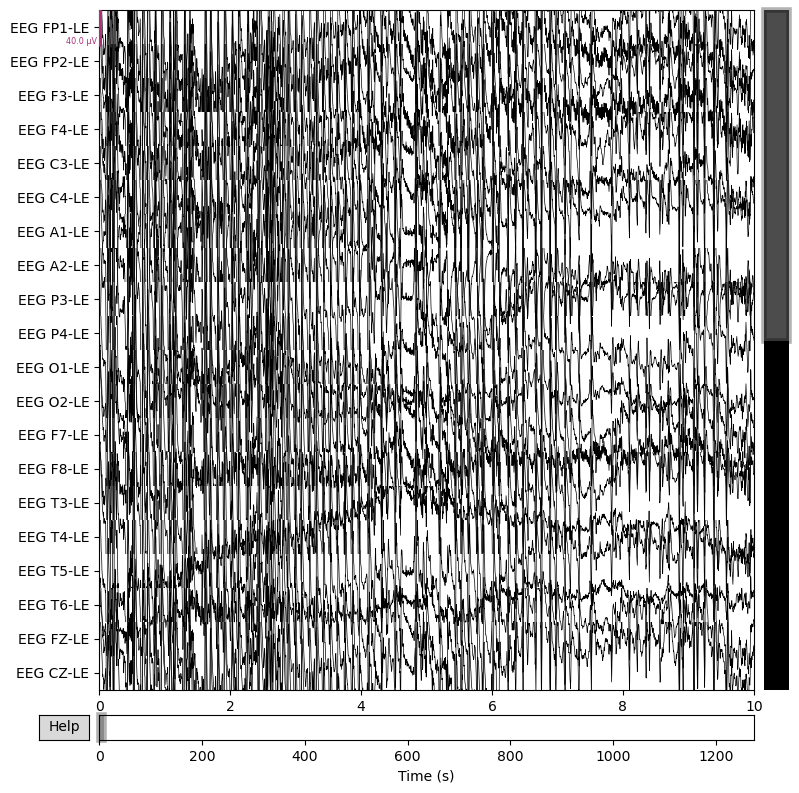

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaike_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaike_s001_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaike_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


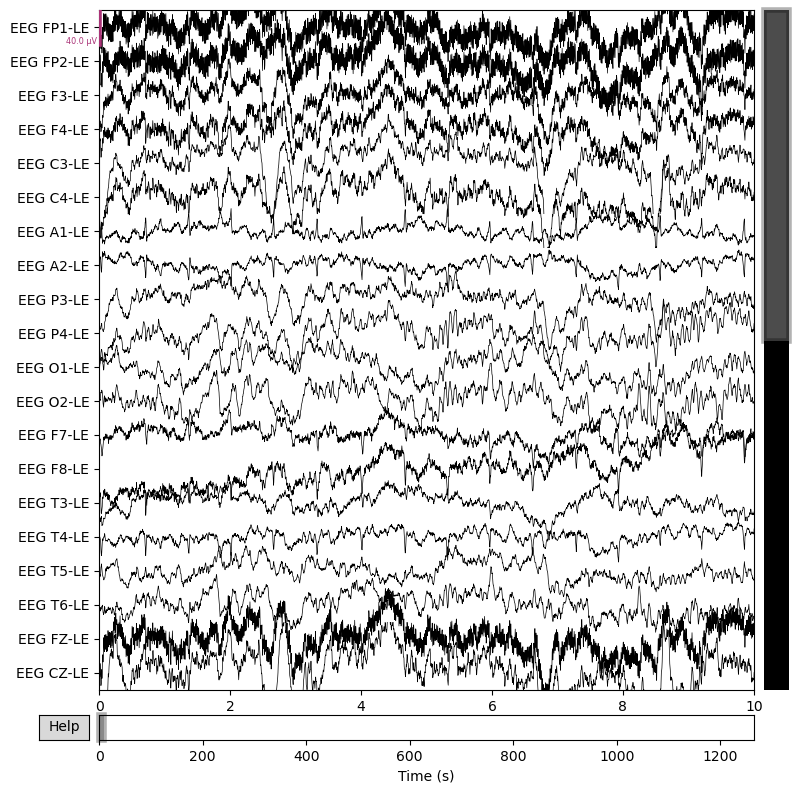

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s002_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s002_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s002_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


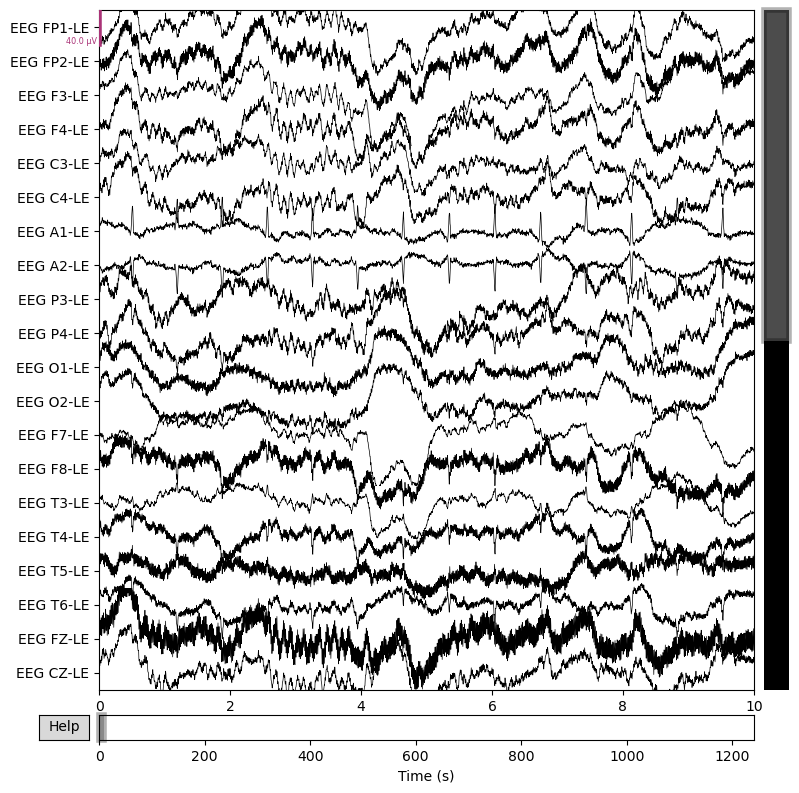

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s003_t002.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s003_t002.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s003_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


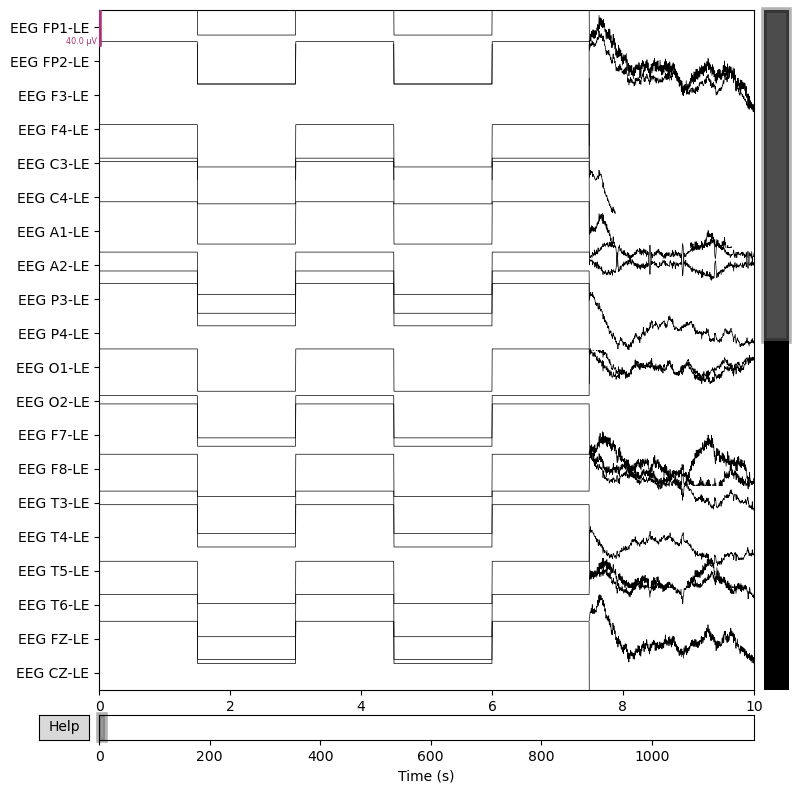

In [153]:
for filename in os.listdir(folder_path):
    if filename.endswith(".edf"):
        edf_file = os.path.join(folder_path, filename)
        csv_file = os.path.join(folder_path, filename[:-4] + ".csv")  # Assuming CSV files have the same name but different extension
        
        # Print the names of the EDF and CSV files
        print("EDF file:", edf_file)
        print("CSV file:", csv_file)
        raw = mne.io.read_raw_edf(edf_file)
        raw.plot();

###  Loading and retrieving signal labels from EDF files

In [154]:
# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".edf"):
        edf_file = os.path.join(folder_path, filename)
        csv_file = os.path.join(folder_path, filename[:-4] + ".csv")  
        
        print("EDF file:", edf_file)
        print("CSV file:", csv_file)
        
        # Load the EDF file using MNE
        raw = mne.io.read_raw_edf(edf_file)
        signal_labels = raw.ch_names
        print("Signal Labels:", signal_labels)

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Signal Labels: ['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE', 'EEG OZ-LE', 'EEG PG1-LE', 'EEG PG2-LE', 'EEG EKG-LE', 'EEG 26-LE', 'EEG 27-LE', 'EEG 28-LE', 'EEG 29-LE', 'EEG 30-LE', 'EEG 31-LE', 'EEG 32-LE', 'PHOTIC PH', 'DC1-DC', 'DC2-DC', 'DC3-DC', 'DC4-DC', 'DC5-DC', 'DC6-DC', 'DC7-DC', 'DC8-DC']
EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.edf
CSV file: /Users/di

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Signal Labels: ['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE', 'EEG OZ-LE', 'EEG PG1-LE', 'EEG PG2-LE', 'EEG EKG-LE', 'EEG 26-LE', 'EEG 27-LE', 'EEG 28-LE', 'EEG 29-LE', 'EEG 30-LE', 'EEG 31-LE', 'EEG 32-LE', 'PHOTIC PH', 'DC1-DC', 'DC2-DC', 'DC3-DC', 'DC4-DC', 'DC5-DC', 'DC6-DC', 'DC7-DC', 'DC8-DC']
EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaike_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaike_s001_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaike_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Signal Labels: ['EEG F

###  Channel mapping directory (from the corresponding montage file)

In [5]:
channel_mapping = {
    'FP1-F7': 'EEG FP1-LE',
    'F7-T3': 'EEG FP2-LE',
    'T3-T5': 'EEG F3-LE',
    'T5-O1': 'EEG F4-LE',
    'FP2-F8': 'EEG C3-LE',
    'F8-T4': 'EEG C4-LE',
    'T4-T6': 'EEG A1-LE',
    'T6-O2': 'EEG A2-LE',
    'A1-T3': 'EEG P3-LE',
    'T3-C3': 'EEG P4-LE',
    'C3-CZ': 'EEG O1-LE',
    'CZ-C4': 'EEG O2-LE',
    'C4-T4': 'EEG F7-LE',
    'T4-A2': 'EEG F8-LE',
    'FP1-F3': 'EEG T3-LE',
    'F3-C3': 'EEG T4-LE',
    'C3-P3': 'EEG T5-LE',
    'P3-O1': 'EEG T6-LE',
    'FP2-F4': 'EEG FZ-LE',
    'F4-C4': 'EEG CZ-LE',
    'C4-P4': 'EEG PZ-LE',
    'P4-O2': 'EEG OZ-LE',
    'EKG': 'EEG PZ-LE'
}

### Processing EDF files for artifact detection and visualization (from the edf files and their corresponding csv files)

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 1304.0
Number of clean 1-second segments: 972
Number of artifact 1-second segments: 331


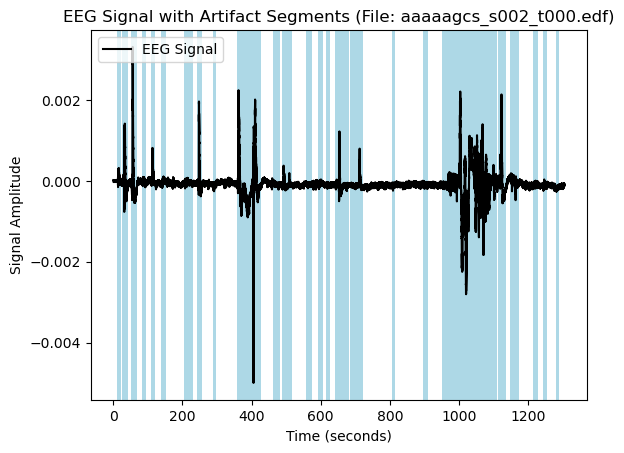

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 555.0
Number of clean 1-second segments: 375
Number of artifact 1-second segments: 179


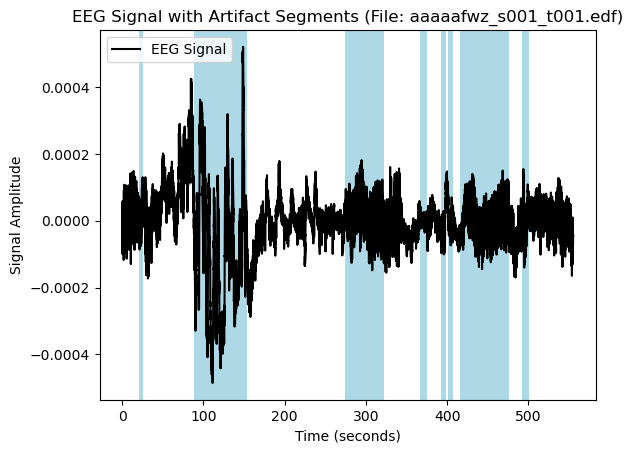

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 1208.0
Number of clean 1-second segments: 542
Number of artifact 1-second segments: 665


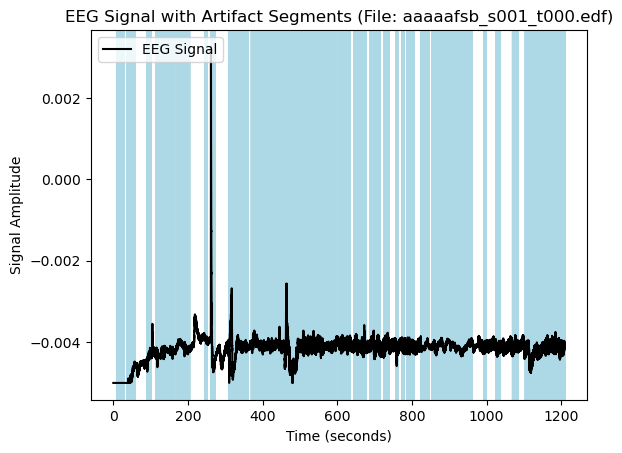

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s020_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s020_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s020_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 141.0
Number of clean 1-second segments: 56
Number of artifact 1-second segments: 84


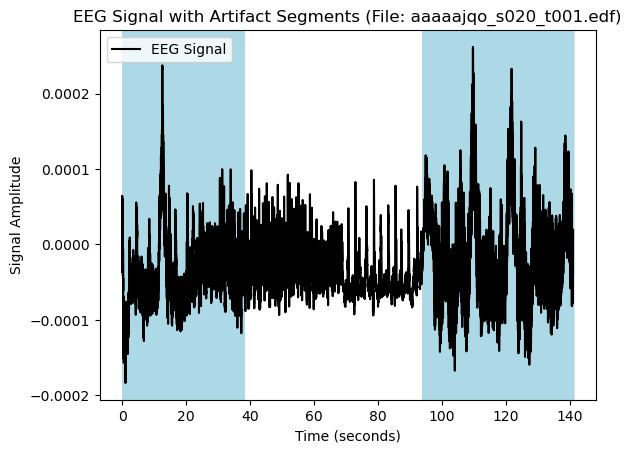

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 833.0
Number of clean 1-second segments: 520
Number of artifact 1-second segments: 312


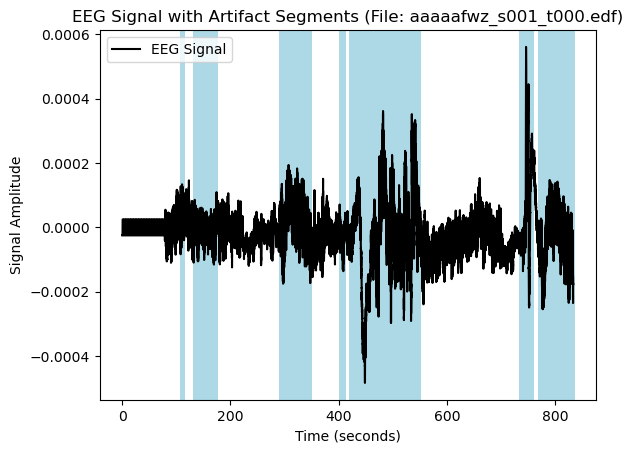

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaabms_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaabms_s001_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaabms_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 1821.0
Number of clean 1-second segments: 1730
Number of artifact 1-second segments: 90


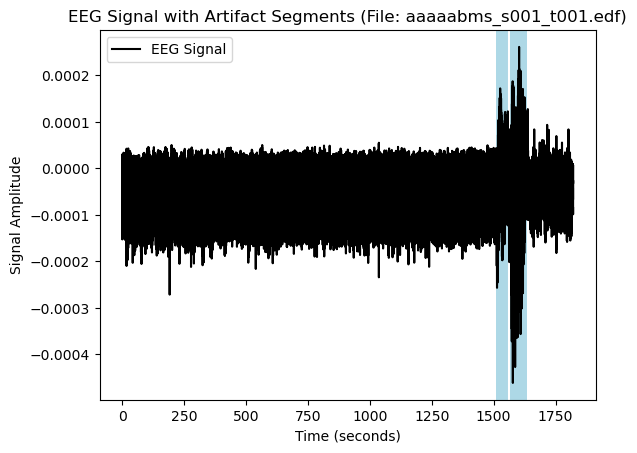

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s001_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s001_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 1210.0
Number of clean 1-second segments: 1097
Number of artifact 1-second segments: 112


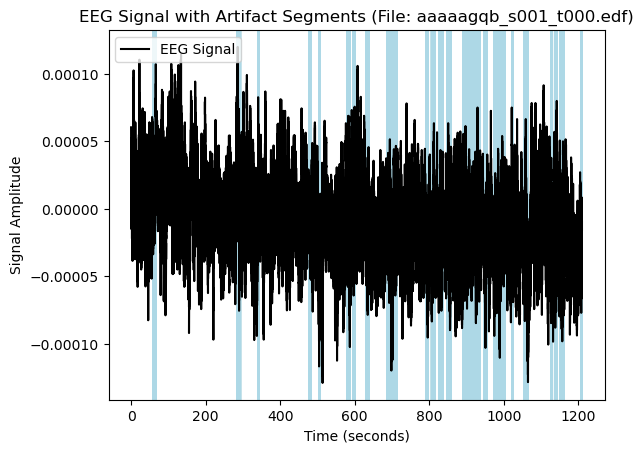

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s008_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s008_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s008_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 1077.0
Number of clean 1-second segments: 645
Number of artifact 1-second segments: 431


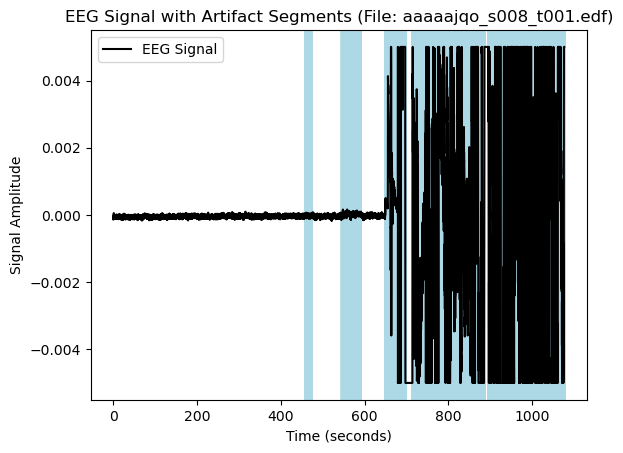

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqb_s001_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqb_s001_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqb_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 1204.0
Number of clean 1-second segments: 735
Number of artifact 1-second segments: 468


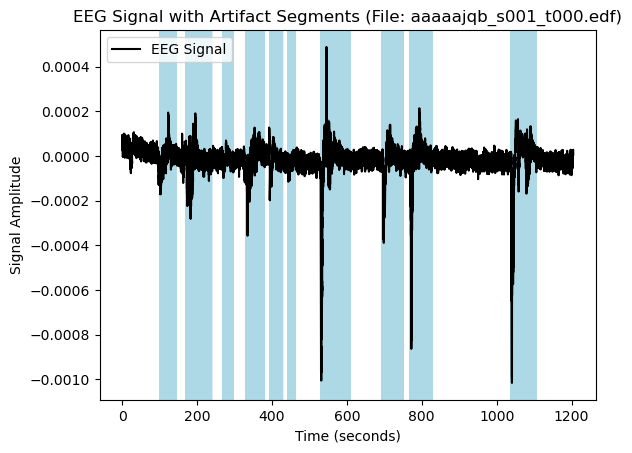

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaltw_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaltw_s001_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaltw_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 1274.0
Number of clean 1-second segments: 1198
Number of artifact 1-second segments: 75


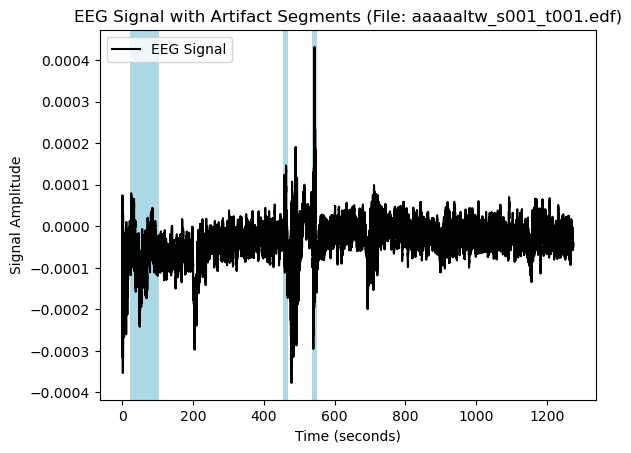

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaike_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaike_s001_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaike_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 1265.0
Number of clean 1-second segments: 415
Number of artifact 1-second segments: 849


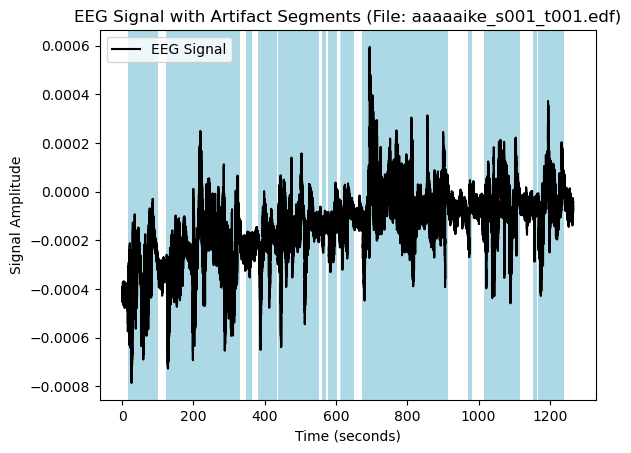

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s002_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s002_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s002_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 1241.0
Number of clean 1-second segments: 496
Number of artifact 1-second segments: 744


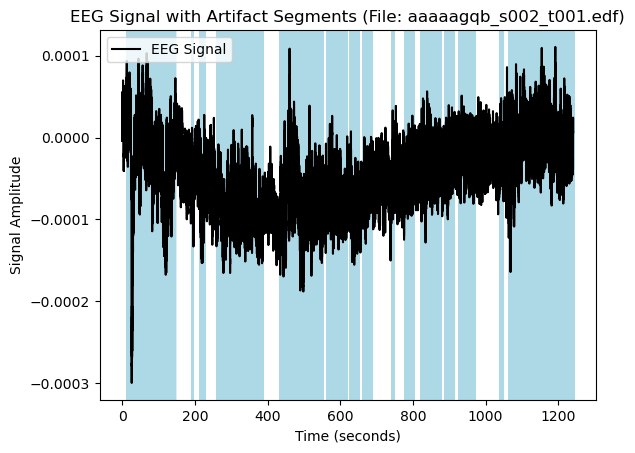

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s003_t002.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s003_t002.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s003_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 1185.0
Number of clean 1-second segments: 644
Number of artifact 1-second segments: 540


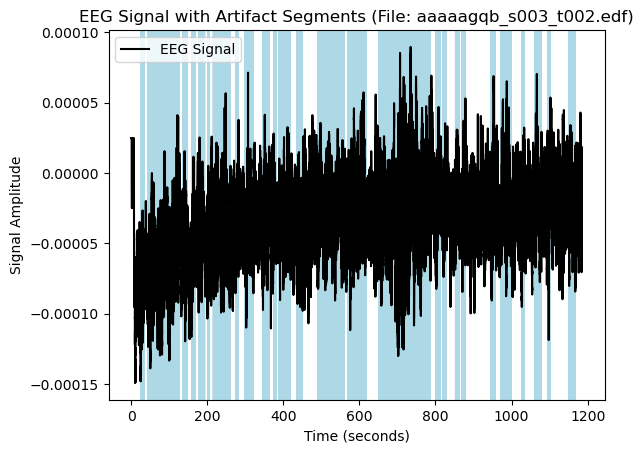

In [30]:
window_size = 1  # Time window size in seconds

artifact_labels = ['eyem', 'chew', 'shiv', 'musc', 'elec', 'eyem_musc', 'musc_elec', 'eyem_elec', 'eyem_chew', 'chew_musc', 'elpp', 'chew_elec', 'eyem_shiv', 'shiv_elec']

Y = []  # List to store labels for each sample

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".edf"):
        edf_file = os.path.join(folder_path, filename)
        csv_file = os.path.join(folder_path, filename[:-4] + ".csv")  
        
        print("EDF file:", edf_file)
        print("CSV file:", csv_file)
        
        # Load the EDF file
        raw = mne.io.read_raw_edf(edf_file)
        
        # Get the duration of the EDF file in seconds
        duration_seconds = raw.n_times / raw.info['sfreq']
        print("Duration (seconds):", duration_seconds)
        
        # Load the CSV file
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)

            # Skip the initial rows until the expected structure is found
            for _ in range(6):
                next(csv_reader)

            # Initialize the labels array with clean labels
            num_samples = int(raw.info['sfreq'] * raw.times[-1])  # Total number of samples
            labels = np.ones(num_samples)  # Initialize all samples as clean

            # Process the labeled segments
            for row in csv_reader:
                if row[0] == 'channel':
                    continue  # Skip the header row

                channel = row[0]
                start_time = float(row[1])
                stop_time = float(row[2])
                label = row[3]
                confidence = float(row[4])

                # Check if the label is an artifact
                if label in artifact_labels:
                    # Find the corresponding channel name in the EDF data
                    edf_channel = channel_mapping.get(channel)
                    if edf_channel:
                        # Find the indices of the channel in the EDF data
                        channel_indices = [i for i, ch_name in enumerate(raw.ch_names) if ch_name == edf_channel]

                        # Convert the start and stop times to sample indices
                        start_sample = int(start_time * raw.info['sfreq'])
                        stop_sample = int(stop_time * raw.info['sfreq'])

                        # Set the labels within the window as artifacts
                        labels[start_sample:stop_sample] = 0

            # Calculate the number of 1-second clean and artifact segments
            window_size_samples = int(window_size * raw.info['sfreq'])
            num_clean_segments = np.sum(labels[:int(duration_seconds * raw.info['sfreq'])] == 1) // window_size_samples
            num_artifact_segments = np.sum(labels[:int(duration_seconds * raw.info['sfreq'])] == 0) // window_size_samples

            print("Number of clean 1-second segments:", num_clean_segments)
            print("Number of artifact 1-second segments:", num_artifact_segments)

        # Plot the signal of the file, including clean and artifact segments
        time = np.arange(0, duration_seconds, 1 / raw.info['sfreq'])
        plt.plot(time, raw.get_data()[0], color='k', label='EEG Signal')

# Highlight the artifact segments in baby blue
        for i in range(len(labels)):
            if labels[i] == 0:
                start_time = i / raw.info['sfreq']
                stop_time = (i + 1) / raw.info['sfreq']
                plt.axvspan(start_time, stop_time, color='lightblue', alpha=0.3)

        plt.xlabel('Time (seconds)')
        plt.ylabel('Signal Amplitude')
        plt.title(f'EEG Signal with Artifact Segments (File: {filename})')
        plt.legend(loc='upper left')
        plt.show()

### Distribution of Artifact Types

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 1304.0
EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 555.0
EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_t000.csv
Extracting EDF parameters from /Users/diogjen

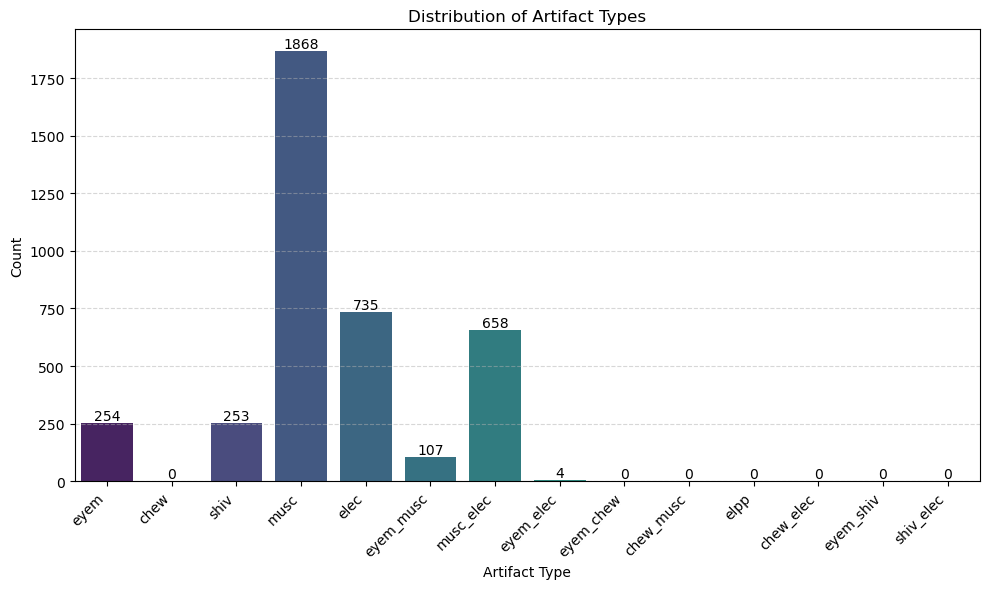

In [43]:
artifact_counts = {label: 0 for label in artifact_labels}  # Dictionary to store the counts of each artifact type


# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".edf"):
        edf_file = os.path.join(folder_path, filename)
        csv_file = os.path.join(folder_path, filename[:-4] + ".csv")  
        
        print("EDF file:", edf_file)
        print("CSV file:", csv_file)
        
        # Load the EDF file
        raw = mne.io.read_raw_edf(edf_file)
        
        # Get the duration of the EDF file in seconds
        duration_seconds = raw.n_times / raw.info['sfreq']
        print("Duration (seconds):", duration_seconds)
        
        # Load the CSV file
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)

            # Skip the initial rows until the expected structure is found
            for _ in range(6):
                next(csv_reader)

            # Initialize the labels array with clean labels
            num_samples = int(raw.info['sfreq'] * raw.times[-1])  # Total number of samples
            labels = np.ones(num_samples)  # Initialize all samples as clean

            # Process the labeled segments
            for row in csv_reader:
                if row[0] == 'channel':
                    continue  # Skip the header row

                channel = row[0]
                start_time = float(row[1])
                stop_time = float(row[2])
                label = row[3].strip().lower()  # Convert to lowercase and remove leading/trailing spaces
                confidence = float(row[4])

                # Check if the label is an artifact
                if label in artifact_labels:
                    # Find the corresponding channel name in the EDF data
                    edf_channel = channel_mapping.get(channel)
                    if edf_channel:
                        # Find the indices of the channel in the EDF data
                        channel_indices = [i for i, ch_name in enumerate(raw.ch_names) if ch_name == edf_channel]

                        # Convert the start and stop times to sample indices
                        start_sample = int(start_time * raw.info['sfreq'])
                        stop_sample = int(stop_time * raw.info['sfreq'])

                        # Set the labels within the window as artifacts
                        labels[start_sample:stop_sample] = 0

                        # Update the artifact counts
                        artifact_counts[label] += 1

            # Calculate the number of 1-second clean and artifact segments
            window_size_samples = int(window_size * raw.info['sfreq'])
            num_clean_segments = np.sum(labels[:int(duration_seconds * raw.info['sfreq'])] == 1) // window_size_samples
            num_artifact_segments = np.sum(labels[:int(duration_seconds * raw.info['sfreq'])] == 0) // window_size_samples

# Plot the distribution of artifact types
labels = list(artifact_counts.keys())
counts = list(artifact_counts.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts, palette='viridis')

# Add count values on top of each bar
for i in range(len(labels)):
    plt.text(i, counts[i], counts[i], ha='center', va='bottom')

plt.xlabel('Artifact Type')
plt.ylabel('Count')
plt.title('Distribution of Artifact Types')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Printing the total number of clean and artifact segments for the whole folder

In [19]:
total_clean_segments = 0
total_artifact_segments = 0

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".edf"):
        edf_file = os.path.join(folder_path, filename)
        csv_file = os.path.join(folder_path, filename[:-4] + ".csv")  
        
        # Load the EDF file
        raw = mne.io.read_raw_edf(edf_file)
        
        # Get the duration of the EDF file in seconds
        duration_seconds = raw.n_times / raw.info['sfreq']
        
        # Load the CSV file
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)

            # Skip the initial rows until the expected structure is found
            for _ in range(6):
                next(csv_reader)

            # Initialize the labels array with clean labels
            num_samples = int(raw.info['sfreq'] * raw.times[-1])  # Total number of samples
            labels = np.ones(num_samples)  # Initialize all samples as clean

            # Process the labeled segments
            for row in csv_reader:
                if row[0] == 'channel':
                    continue  # Skip the header row

                channel = row[0]
                start_time = float(row[1])
                stop_time = float(row[2])
                label = row[3]
                confidence = float(row[4])

                # Check if the label is an artifact
                if label in artifact_labels:
                    # Find the corresponding channel name in the EDF data
                    edf_channel = channel_mapping.get(channel)
                    if edf_channel:
                        # Find the indices of the channel in the EDF data
                        channel_indices = [i for i, ch_name in enumerate(raw.ch_names) if ch_name == edf_channel]

                        # Convert the start and stop times to sample indices
                        start_sample = int(start_time * raw.info['sfreq'])
                        stop_sample = int(stop_time * raw.info['sfreq'])

                        # Set the labels within the window as artifacts
                        labels[start_sample:stop_sample] = 0

            # Calculate the number of 1-second clean and artifact segments
            window_size_samples = int(window_size * raw.info['sfreq'])
            num_clean_segments = np.sum(labels[:int(duration_seconds * raw.info['sfreq'])] == 1) // window_size_samples
            num_artifact_segments = np.sum(labels[:int(duration_seconds * raw.info['sfreq'])] == 0) // window_size_samples

            total_clean_segments += num_clean_segments
            total_artifact_segments += num_artifact_segments

# Print the total number of clean and artifact segments for the whole folder
print("Total Clean Segments ({}s window size):".format(window_size), total_clean_segments)
print("Total Artifact Segments ({}s window size):".format(window_size), total_artifact_segments)


Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s020_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Use

### Setting a threshold - Reconstruction Error vs. Threshold

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_

/Users/diogjen/anaconda3/lib/python3.10/site-packages/pywt/_thresholding.py:23: RuntimeWarning: invalid value encountered in divide
  thresholded = (1 - value/magnitude)


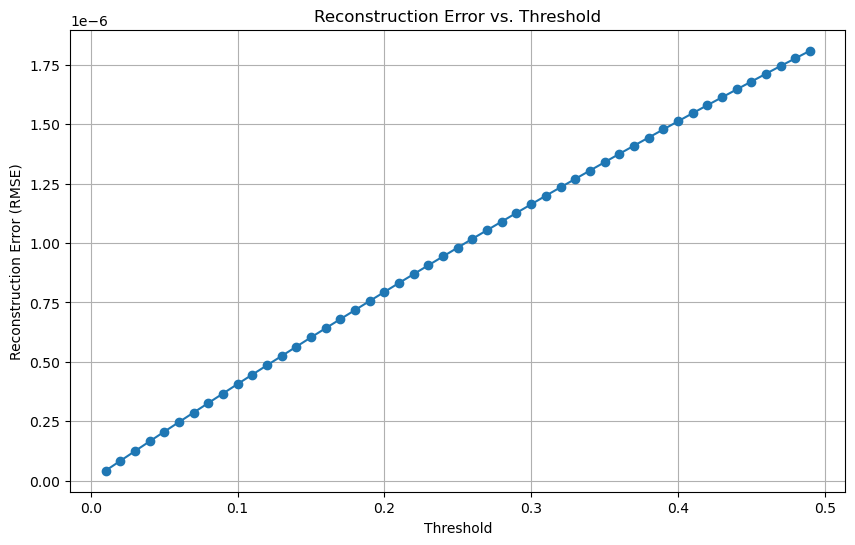

In [44]:
# Define the wavelet function and level of decomposition for db4

for filename in os.listdir(folder_path):
    if filename.endswith(".edf"):
        edf_file = os.path.join(folder_path, filename)
        csv_file = os.path.join(folder_path, filename[:-4] + ".csv")  # Assuming CSV files have the same name but different extension
        
        print("EDF file:", edf_file)
        print("CSV file:", csv_file)
        
        # Load the EDF file
        raw = mne.io.read_raw_edf(edf_file)
        
wavelet = 'haar'  # Wavelet type (change it to the desired wavelet)
level = 5  # Level of decomposition (change it to the desired level)

# Original signal
original_signal = raw.get_data()[1]

# Range of threshold values
threshold_range = np.arange(0, 0.5, 0.01)

# List to store the reconstruction errors for each threshold
reconstruction_errors = []

# Iterate over the threshold values
for threshold in threshold_range:
    # Apply wavelet decomposition
    coeffs = pywt.wavedec(original_signal, wavelet, level=level)

    # Set the threshold based on the current value
    threshold_value = np.std(coeffs[-1]) * threshold

    # Apply thresholding to the coefficients
    thresholded_coeffs = [pywt.threshold(c, threshold_value) for c in coeffs]

    # Reconstruct the signal using the thresholded coefficients
    reconstructed_signal = pywt.waverec(thresholded_coeffs, wavelet)

    # Calculate the reconstruction error (RMSE)
    error = np.sqrt(np.mean((original_signal - reconstructed_signal) ** 2))

    # Store the reconstruction error
    reconstruction_errors.append(error)

# Plot the reconstruction errors
plt.figure(figsize=(10, 6))
plt.plot(threshold_range, reconstruction_errors, marker='o')
plt.xlabel('Threshold')
plt.ylabel('Reconstruction Error (RMSE)')
plt.title('Reconstruction Error vs. Threshold')
plt.grid(True)
plt.show()

### RMSE between original and reconstructed signals

In [45]:
# Calculate RMSE between original and reconstructed signals
rmse = np.sqrt(np.mean((original_signal - reconstructed_signal) ** 2))

print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 1.8097230123004632e-06


### Original and Reconstructed Signals using Haar mother Wavelet

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


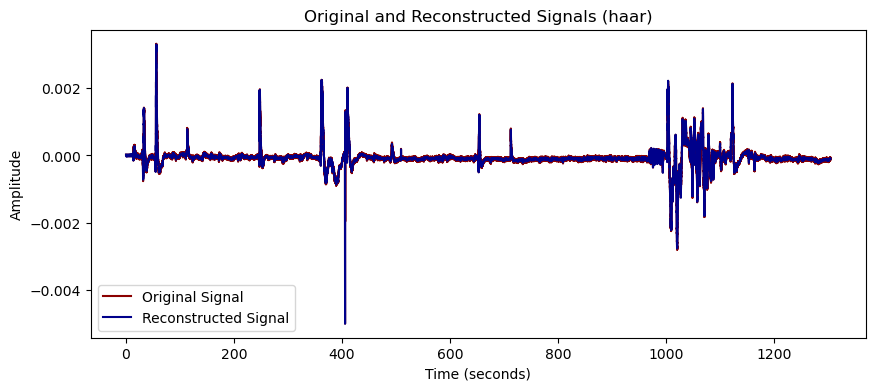

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


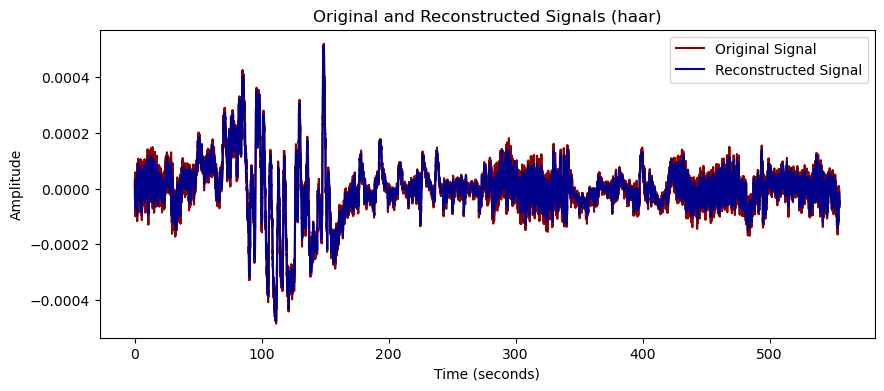

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafsb_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


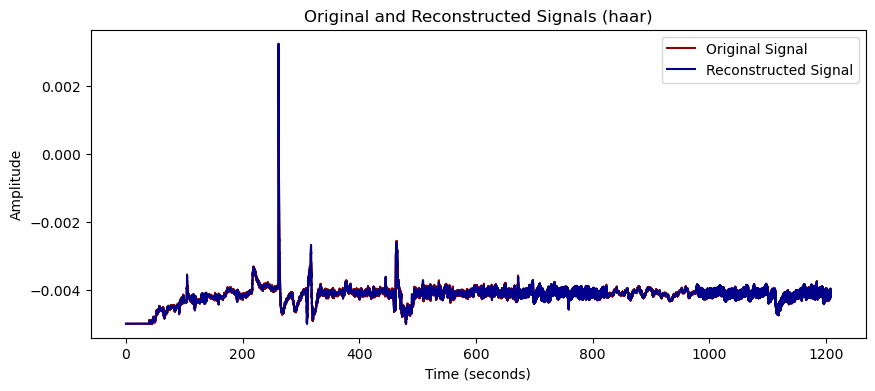

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s020_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s020_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s020_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


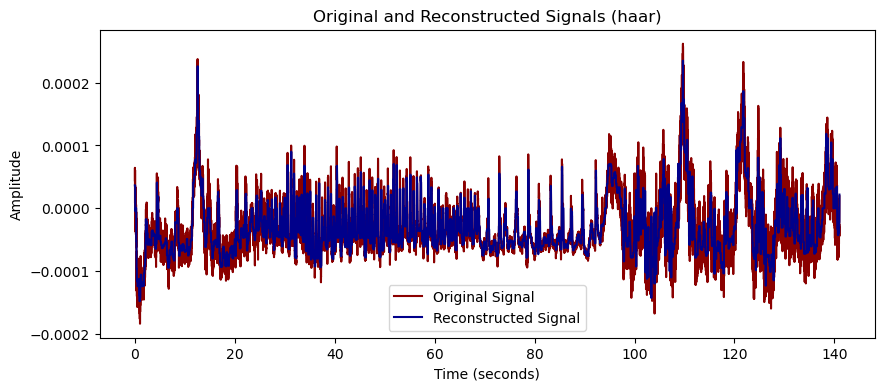

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


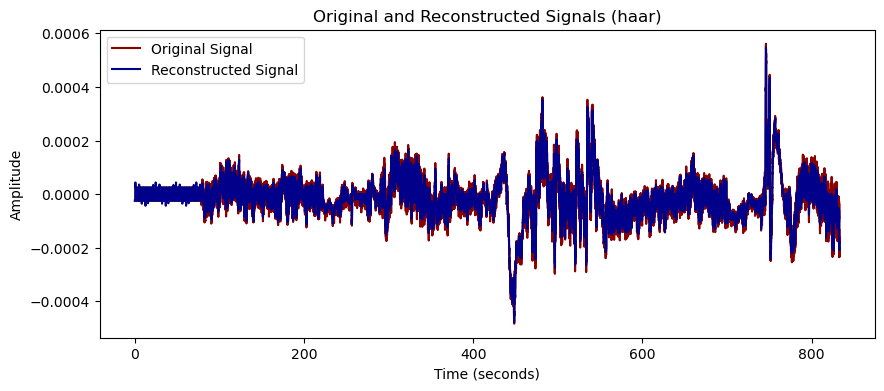

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaabms_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaabms_s001_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaabms_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


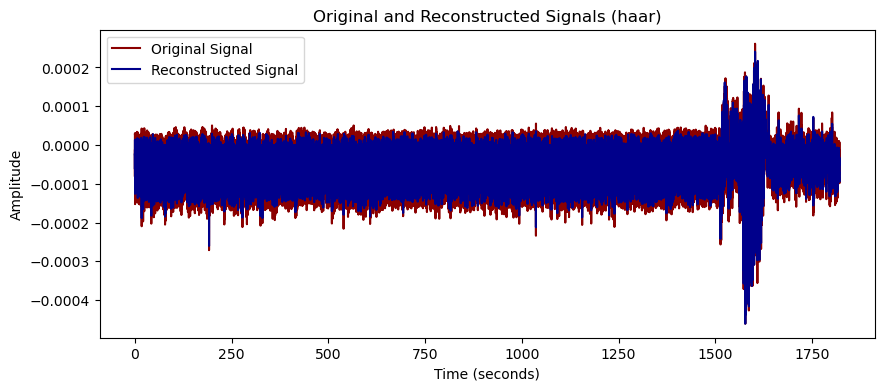

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s001_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s001_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


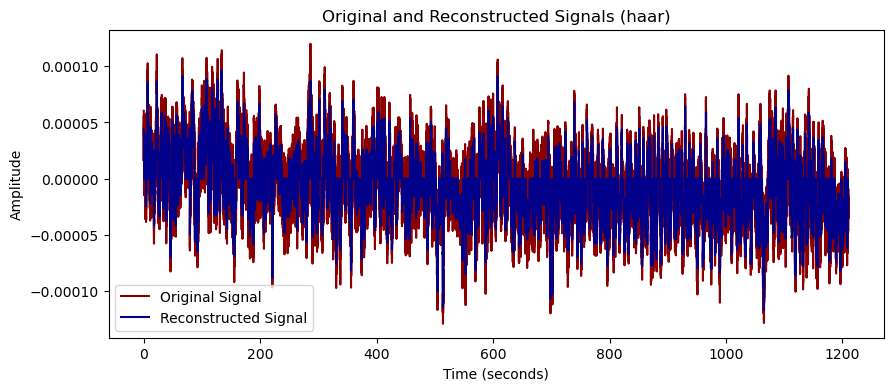

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s008_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s008_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqo_s008_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


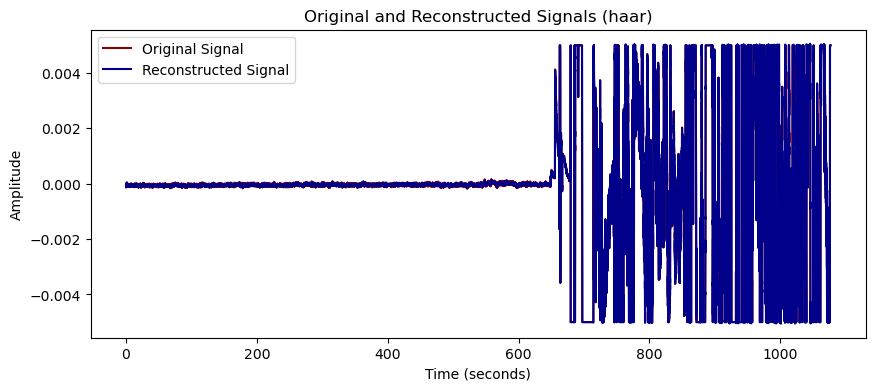

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqb_s001_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqb_s001_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaajqb_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


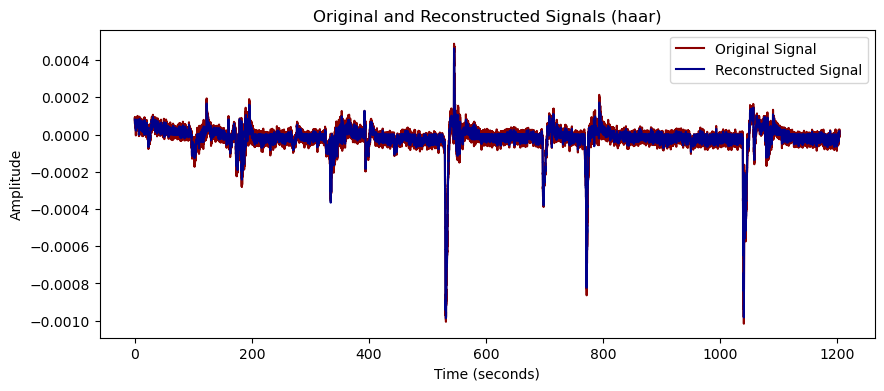

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaltw_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaltw_s001_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaltw_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


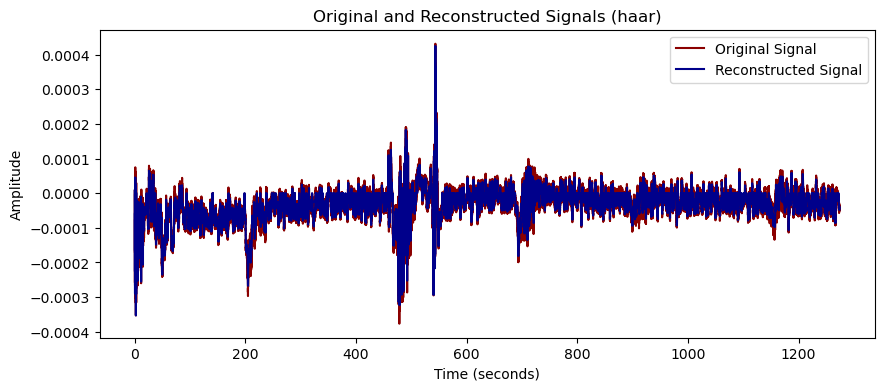

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaike_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaike_s001_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaaike_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


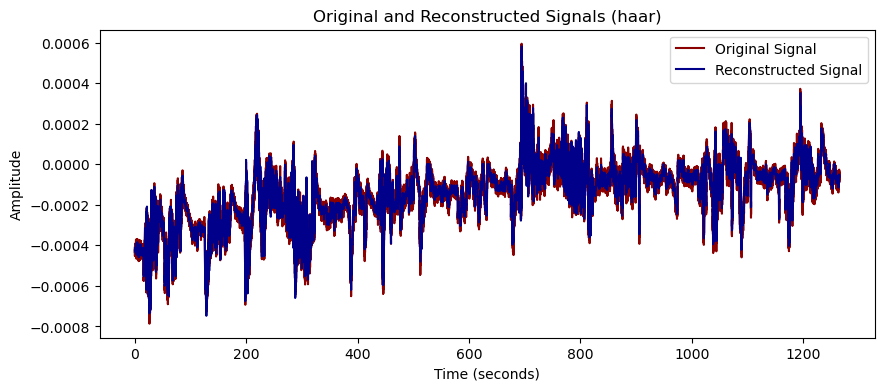

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s002_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s002_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s002_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


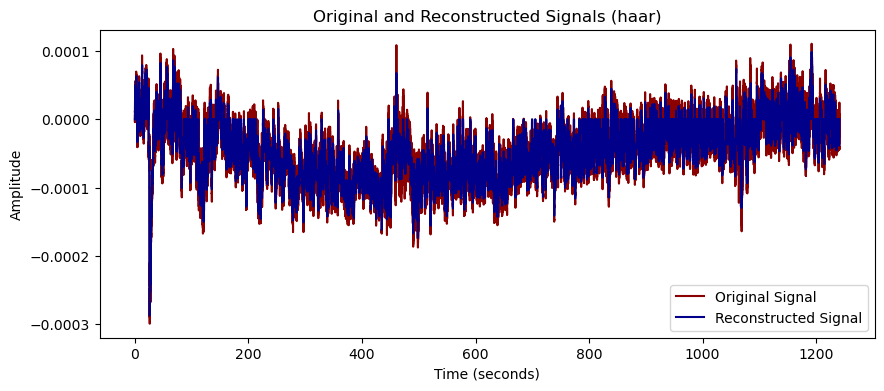

EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s003_t002.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s003_t002.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagqb_s003_t002.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


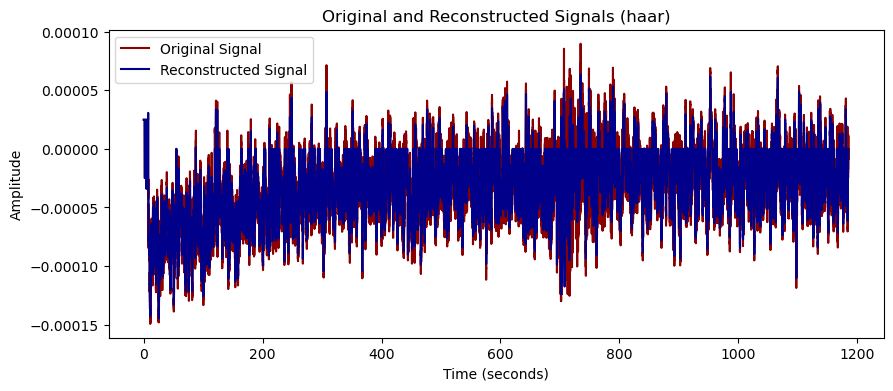

In [33]:
# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".edf"):
        edf_file = os.path.join(folder_path, filename)
        csv_file = os.path.join(folder_path, filename[:-4] + ".csv")  
        
        print("EDF file:", edf_file)
        print("CSV file:", csv_file)
        
        # Load the EDF file
        raw = mne.io.read_raw_edf(edf_file)
        
        # Original signal
        original_signal = raw.get_data()[0]
        sfreq = raw.info['sfreq']
        duration_seconds = raw.n_times / sfreq
        time = np.linspace(0, duration_seconds, len(original_signal))

        # Apply the db4 wavelet transform
        coeffs = pywt.wavedec(original_signal, wavelet='haar', level=5)  # Adjust the level as needed

        # Set the threshold value
        threshold = 0.00007

        # Apply the threshold to the wavelet coefficients
        thresholded_coeffs = [np.where(np.abs(c) < threshold, 0, c) for c in coeffs]
        
        # Reconstruct the signal from the thresholded wavelet coefficients
        reconstructed_signal = pywt.waverec(thresholded_coeffs, wavelet='haar')
        reconstructed_time = np.linspace(0, duration_seconds, len(reconstructed_signal))

        # Plot the original and reconstructed signals in the time domain
        plt.figure(figsize=(10, 4))
        plt.plot(time, original_signal, color='darkred', label='Original Signal')
        plt.plot(reconstructed_time, reconstructed_signal, color='darkblue', label='Reconstructed Signal')
        plt.title("Original and Reconstructed Signals (haar)")
        plt.xlabel("Time (seconds)")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.show()


### 8. Wavelet Transform and feature extraction for artifact detection

In [23]:
threshold = 0.00007

X = []  # List to store wavelet coefficients for each sample
Y = []  # List to store labels for each sample

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".edf"):
        edf_file = os.path.join(folder_path, filename)
        csv_file = os.path.join(folder_path, filename[:-4] + ".csv")  
        print("EDF file:", edf_file)
        print("CSV file:", csv_file)

        # Load the EDF file
        raw = mne.io.read_raw_edf(edf_file)

        # Get the duration of the EDF file in seconds
        duration_seconds = raw.n_times / raw.info['sfreq']
        print("Duration (seconds):", duration_seconds)

        # Load the CSV file
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)

            # Skip the initial rows until the expected structure is found
            for _ in range(6):
                next(csv_reader)

            # Initialize the labels array with clean labels
            num_samples = int(raw.info['sfreq'] * raw.times[-1])  # Total number of samples
            labels = np.ones(num_samples)  # Initialize all samples as clean

            # Process the labeled segments
            for row in csv_reader:
                if row[0] == 'channel':
                    continue  # Skip the header row

                channel = row[0]
                start_time = float(row[1])
                stop_time = float(row[2])
                label = row[3]
                confidence = float(row[4])

                # Check if the label is an artifact
                if label in artifact_labels:
                    # Find the corresponding channel name in the EDF data
                    edf_channel = channel_mapping.get(channel)
                    if edf_channel:
                        # Find the indices of the channel in the EDF data
                        channel_indices = [i for i, ch_name in enumerate(raw.ch_names) if ch_name == edf_channel]

                        # Convert the start and stop times to sample indices
                        start_sample = int(start_time * raw.info['sfreq'])
                        stop_sample = int(stop_time * raw.info['sfreq'])

                        # Set the labels within the window as artifacts
                        labels[start_sample:stop_sample] = 0

            # Calculate the number of 1-second clean and artifact segments
            window_size_samples = int(window_size * raw.info['sfreq'])
            num_clean_segments = np.sum(labels[:int(duration_seconds * raw.info['sfreq'])] == 1) // window_size_samples
            num_artifact_segments = np.sum(labels[:int(duration_seconds * raw.info['sfreq'])] == 0) // window_size_samples

            print("Number of clean 1-second segments:", num_clean_segments)
            print("Number of artifact 1-second segments:", num_artifact_segments)

            # Apply wavelet transform to each 1-second segment
            for i in range(num_clean_segments + num_artifact_segments):
                start_idx = i * window_size_samples
                stop_idx = start_idx + window_size_samples

                # Extract the segment data
                segment_data = raw.get_data()[:, start_idx:stop_idx]  # Assuming you want to process all channels

                # Apply wavelet transform to the segment
                con_coeffs = pywt.wavedec(segment_data, wavelet='haar', level=5)  # Adjust the wavelet and level as needed

                concatenated_coeffs = np.concatenate([c.ravel().astype(np.float64) for level_coeffs in con_coeffs for c in level_coeffs])

                # Select the significant coefficients based on threshold
                significant_coeffs = concatenated_coeffs[np.abs(concatenated_coeffs) > threshold]

                X.append(concatenated_coeffs)
                Y.append(labels[start_idx:stop_idx])

# Convert the lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
print("Data type of X:", X.dtype)
print("Data type of Y:", Y.dtype)


EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaagcs_s002_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 1304.0
Number of clean 1-second segments: 972
Number of artifact 1-second segments: 331
EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.edf
CSV file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.csv
Extracting EDF parameters from /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02_tcp_le/aaaaafwz_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Duration (seconds): 555.0
Number of clean 1-second segments: 375
Number of artifact 1-second segments: 179
EDF file: /Users/diogjen/Desktop/E-Health/v3.0.0/edf/02

/var/folders/zk/9vvknt8s4f3cfymmhds2d_wc0000gn/T/ipykernel_4089/2814476871.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


### Supervised Machine Learning Model: Linear Discriminant Analysis (LDA)

In [162]:
# Find the max length of all the coefficient arrays
max_len = max(len(x) for x in X)

# Zero-pad each coefficient array up to max_len
X_padded = np.array([np.pad(x, (0, max_len - len(x))) for x in X])

print("Shape of X_padded:", X_padded.shape)
print("Data type of X_padded:", X_padded.dtype)

# Extract the label column from Y
Y = Y[:, 0]  # Assuming the label column is the first column, adjust if needed

# Reshape Y to 1D
Y = Y.flatten()  # or Y = np.ravel(Y)

print("Shape of Y:", Y.shape)

random.seed(42)

num_samples = len(X_padded)

# Calculate the number of samples for each set based on ratios
num_train = int(0.8 * num_samples)
num_val = int(0.1 * num_samples)
num_test = num_samples - num_train - num_val

# Shuffle the indices of the samples
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Split the shuffled indices into train, validation, and test sets
train_indices = indices[:num_train]
val_indices = indices[num_train:num_train + num_val]
test_indices = indices[num_train + num_val:]

# Create the training, validation, and test sets
X_train = X_padded[train_indices]
X_val = X_padded[val_indices]
X_test = X_padded[test_indices]
Y_train = Y[train_indices]
Y_val = Y[val_indices]
Y_test = Y[test_indices]

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_val:", Y_val.shape)
print("Shape of Y_test:", Y_test.shape)

# Create an LDA classifier
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train, Y_train)

# Perform prediction on the test set
Y_test_pred = lda.predict(X_test)

# Calculate accuracy score on the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Test Accuracy:", test_accuracy)

Shape of X_padded: (14305, 10332)
Data type of X_padded: float64
Shape of Y: (14305,)
Shape of X_train: (11444, 10332)
Shape of X_val: (1430, 10332)
Shape of X_test: (1431, 10332)
Shape of Y_train: (11444,)
Shape of Y_val: (1430,)
Shape of Y_test: (1431,)
Test Accuracy: 0.6142557651991615


In [24]:
# Find the max length of all the coefficient arrays
max_len = max(len(x) for x in X)

# Zero-pad each coefficient array up to max_len
X_padded = np.array([np.pad(x, (0, max_len - len(x))) for x in X])

print("Shape of X_padded:", X_padded.shape)
print("Data type of X_padded:", X_padded.dtype)

# Extract the label column from Y
Y = Y[:, 0]  # Assuming the label column is the first column, adjust if needed

# Reshape Y to 1D
Y = Y.flatten()  # or Y = np.ravel(Y)

print("Shape of Y:", Y.shape)

random.seed(42)

num_samples = len(X_padded)

# Calculate the number of samples for each set based on ratios
num_train = int(0.8 * num_samples)
num_val = int(0.1 * num_samples)
num_test = num_samples - num_train - num_val

# Shuffle the indices of the samples
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Split the shuffled indices into train, validation, and test sets
train_indices = indices[:num_train]
val_indices = indices[num_train:num_train + num_val]
test_indices = indices[num_train + num_val:]

# Create the training, validation, and test sets
X_train = X_padded[train_indices]
X_val = X_padded[val_indices]
X_test = X_padded[test_indices]
Y_train = Y[train_indices]
Y_val = Y[val_indices]
Y_test = Y[test_indices]

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_val:", Y_val.shape)
print("Shape of Y_test:", Y_test.shape)

# Create an LDA classifier
lda = LinearDiscriminantAnalysis()

# Perform k-fold cross-validation
k = 5  # Number of folds
scores = cross_val_score(lda, X_train, Y_train, cv=k)

# Print the accuracy scores for each fold
for i, score in enumerate(scores):
    print(f"Fold {i+1} Accuracy: {score}")

# Calculate and print the average accuracy across all folds
average_accuracy = scores.mean()
print("Average Accuracy:", average_accuracy)

# Fit the LDA model to the training data
lda.fit(X_train, Y_train)

# Perform prediction on the test set
Y_test_pred = lda.predict(X_test)

# Calculate accuracy score on the test set
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Test Accuracy:", test_accuracy)

Shape of X_padded: (14305, 10332)
Data type of X_padded: float64
Shape of Y: (14305,)
Shape of X_train: (11444, 10332)
Shape of X_val: (1430, 10332)
Shape of X_test: (1431, 10332)
Shape of Y_train: (11444,)
Shape of Y_val: (1430,)
Shape of Y_test: (1431,)
Fold 1 Accuracy: 0.5792922673656619
Fold 2 Accuracy: 0.5849716033202271
Fold 3 Accuracy: 0.5762341633901267
Fold 4 Accuracy: 0.5792922673656619
Fold 5 Accuracy: 0.5826048951048951
Average Accuracy: 0.5804790393093145
Test Accuracy: 0.6135569531795947


### Test Set Metrics

In [25]:
accuracy_test = accuracy_score(Y_test, Y_test_pred)
precision_test = precision_score(Y_test, Y_test_pred)
recall_test = recall_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred)

# Print the metrics
print("Test Set Metrics:")
print("Accuracy: {:.2f}".format(accuracy_test))
print("Precision: {:.2f}".format(precision_test))
print("Recall: {:.2f}".format(recall_test))
print("F1-Score: {:.2f}".format(f1_test))

Test Set Metrics:
Accuracy: 0.61
Precision: 0.71
Recall: 0.70
F1-Score: 0.70


### ROC Curve

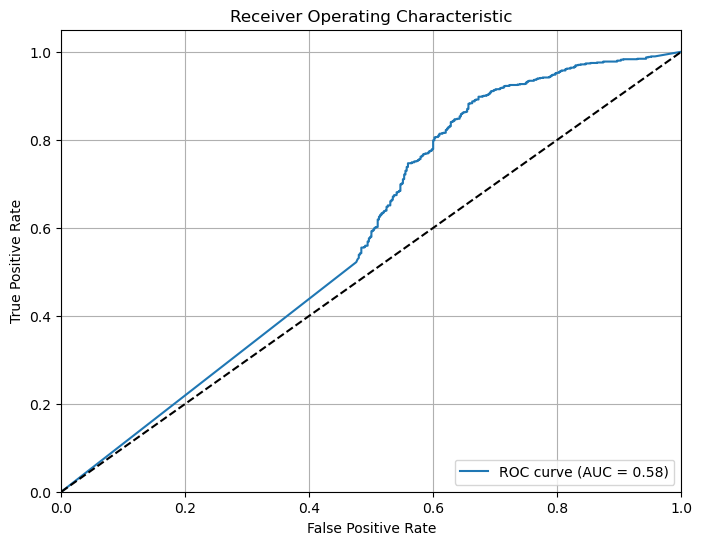

In [35]:
# Compute the predicted probabilities for the positive class
Y_test_prob = lda.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)

# Compute the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Unsuperviased Machine Learning Model: Hierarchical Clustering

In [40]:
# Define the number of clusters
num_clusters = 2

X_cluster = X_padded  

# Initialize the clustering algorithm
clustering = AgglomerativeClustering(n_clusters=num_clusters)

# Fit the clustering algorithm to the data
clustering.fit(X_cluster)

# Get the predicted cluster labels for the samples
cluster_labels = clustering.labels_

# Assign meaningful cluster labels (e.g., "clean" and "artifact")
clean_label = "clean"
artifact_label = "artifact"
cluster_labels = [clean_label if label == 0 else artifact_label for label in cluster_labels]

# Print the number of samples in each cluster
clean_count = cluster_labels.count(clean_label)
artifact_count = cluster_labels.count(artifact_label)
print("Number of samples in 'clean' cluster:", clean_count)
print("Number of samples in 'artifact' cluster:", artifact_count)

Number of samples in 'clean' cluster: 14253
Number of samples in 'artifact' cluster: 52


In [41]:
# Calculate the silhouette score for the clustering results
silhouette_avg = silhouette_score(X_cluster, cluster_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.9733424678630203


Thank you :)